In [1]:
from sklearn.datasets import load_diabetes
from synthcity.plugins import Plugins

Plugins(categories=["generic"]).list()

/home/bv292/miniconda/envs/test_env/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['tvae',
 'ctgan',
 'privbayes',
 'adsgan',
 'sdv_ctgan',
 'copulagan',
 'gaussian_copula',
 'rtvae',
 'pategan',
 'sdv_tvae',
 'nflow',
 'dpgan',
 'bayesian_network']

In [2]:
X, y = load_diabetes(return_X_y=True, as_frame=True)
X["target"] = y

p_train = 0.8
ntrain = int(len(X) * p_train)
print(f"Training on {ntrain} samples")
X_train = X.iloc[:ntrain]
X_test = X.iloc[ntrain:]
nsyn = 1000



Training on 353 samples


In [3]:
n_models = 10
results = []

T = lambda x: 1
X_syns = []
for i in range(n_models):
    print(f"Training model {i}/{n_models}")
    syn_model = Plugins().get('tvae')
    syn_model.fit(X_train)
    X_syn = syn_model.generate(count = nsyn)
    X_syns.append(X_syn)





Training model 0/10
Training model 1/10
Training model 2/10
Training model 3/10
Training model 4/10
Training model 5/10
Training model 6/10
Training model 7/10
Training model 8/10
Training model 9/10


NameError: name 'pd' is not defined

In [9]:
from synthcity.metrics.eval_performance import (
    PerformanceEvaluatorMLP,
    PerformanceEvaluatorXGB,
)
import sklearn
import numpy as np

def T(X):
    model = sklearn.linear_model.LinearRegression()
    model.fit(X.drop(columns='target'), X["target"])
    return model


def aggregate(func_list):
    def aggregate_func(X):
        a = [f(X) for f in func_list]
        return np.mean(a), np.std(a)
    
    return aggregate_func


for i in range(n_models):
    results.append(T(X_syn))

res = aggregate(results)


ValueError: Expected 2D array, got scalar array instead:
array=          age       sex       bmi        bp        s1        s2        s3  \
0   -0.056715 -0.044642 -0.057464  0.042164 -0.043050 -0.041226  0.024040   
1    0.018311  0.050680  0.015414 -0.044328 -0.018948 -0.024287  0.032379   
2    0.015711  0.050680 -0.031409 -0.026144 -0.017107  0.026670  0.018996   
3    0.013723 -0.044642  0.026523  0.081128 -0.007188 -0.022259  0.045402   
4   -0.049329  0.050680 -0.022263  0.043082 -0.001656  0.010973  0.025913   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.043965 -0.044642  0.002970 -0.025827 -0.009839 -0.019461  0.019362   
996  0.028474  0.050680 -0.001738  0.030203  0.019281  0.008061 -0.020030   
997  0.025302  0.050680  0.016025 -0.016892 -0.005025  0.018667 -0.037324   
998 -0.058426  0.050680 -0.032758 -0.026471 -0.009833 -0.018785 -0.039093   
999 -0.062534  0.050680 -0.046784 -0.033975 -0.033478 -0.044561 -0.034822   

           s4        s5        s6  
0   -0.039757 -0.027741 -0.026774  
1   -0.002378  0.012211  0.018739  
2   -0.002688 -0.036531 -0.041121  
3   -0.070717 -0.027126 -0.035436  
4   -0.002764 -0.032193 -0.045600  
..        ...       ...       ...  
995 -0.003081 -0.039431 -0.010061  
996 -0.003769 -0.034101  0.000506  
997  0.077506  0.054454  0.031237  
998  0.085517  0.028916  0.049175  
999 -0.038200 -0.036849 -0.004795  

[1000 rows x 10 columns].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

          0         1         2         3         4         5         6   \
0        1.0  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
1   0.173737       1.0  0.088161   0.24101  0.035277  0.142637  -0.37909   
2   0.185085  0.088161       1.0  0.395411  0.249777   0.26117 -0.366811   
3   0.335428   0.24101  0.395411       1.0  0.242464  0.185548 -0.178762   
4   0.260061  0.035277  0.249777  0.242464       1.0  0.896663  0.051519   
5   0.219243  0.142637   0.26117  0.185548  0.896663       1.0 -0.196455   
6  -0.075181  -0.37909 -0.366811 -0.178762  0.051519 -0.196455       1.0   
7   0.203841  0.332115  0.413807   0.25765  0.542207  0.659817 -0.738493   
8   0.270774  0.149916  0.446157   0.39348  0.515503  0.318357 -0.398577   
9   0.301731  0.208133   0.38868   0.39043  0.325717    0.2906 -0.273697   
10  0.187889  0.043062   0.58645  0.441482  0.212022  0.174054 -0.394789   

          7         8         9         10  
0   0.203841  0.270774  0.301731  0.187889

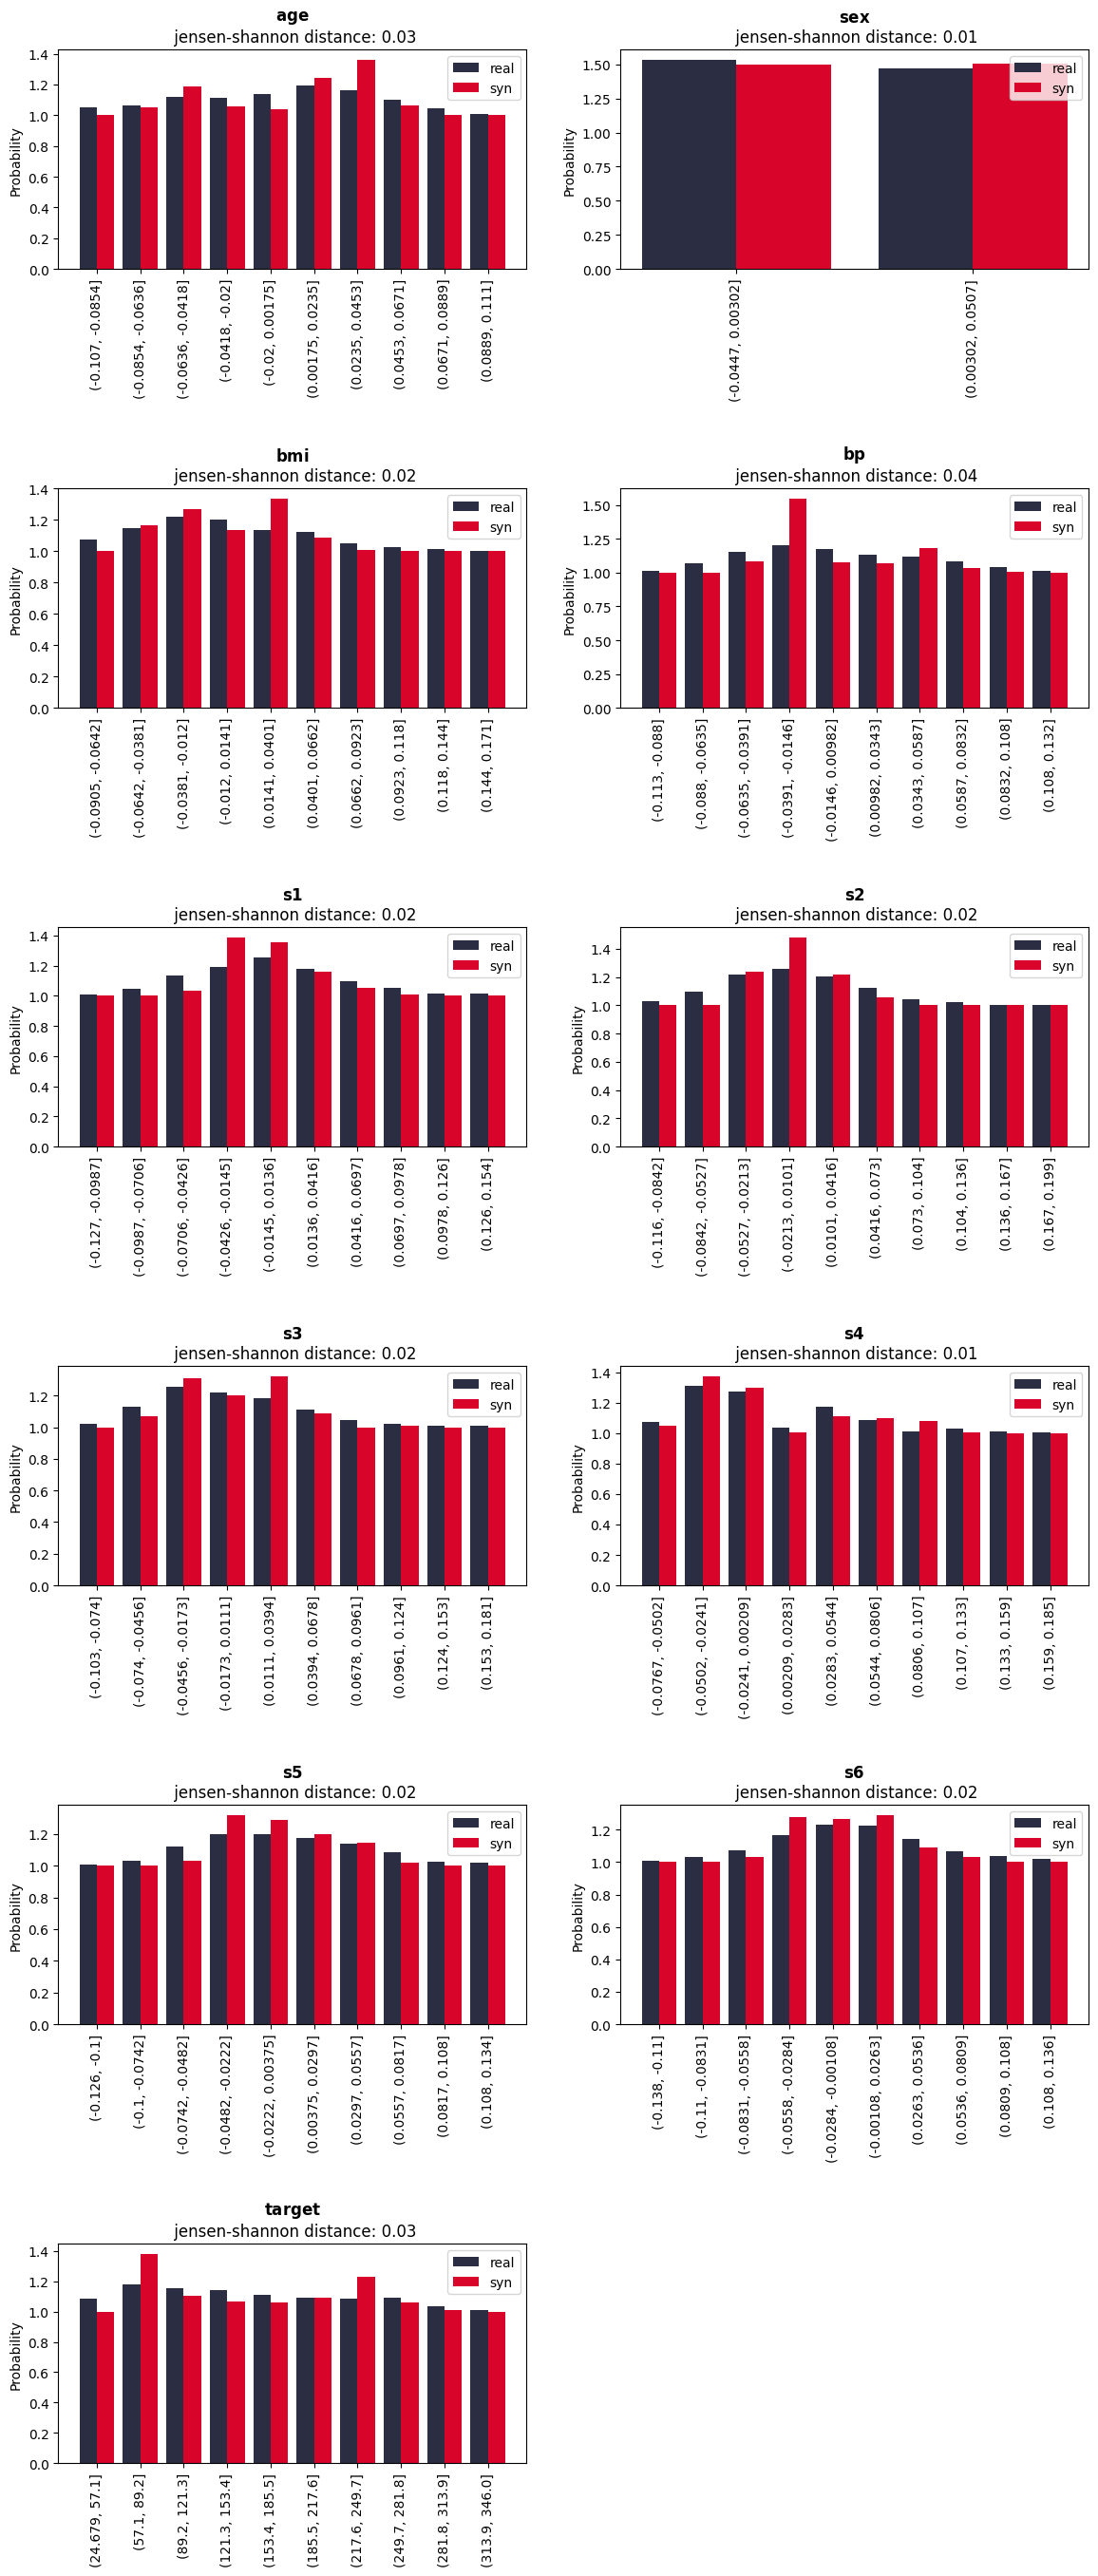

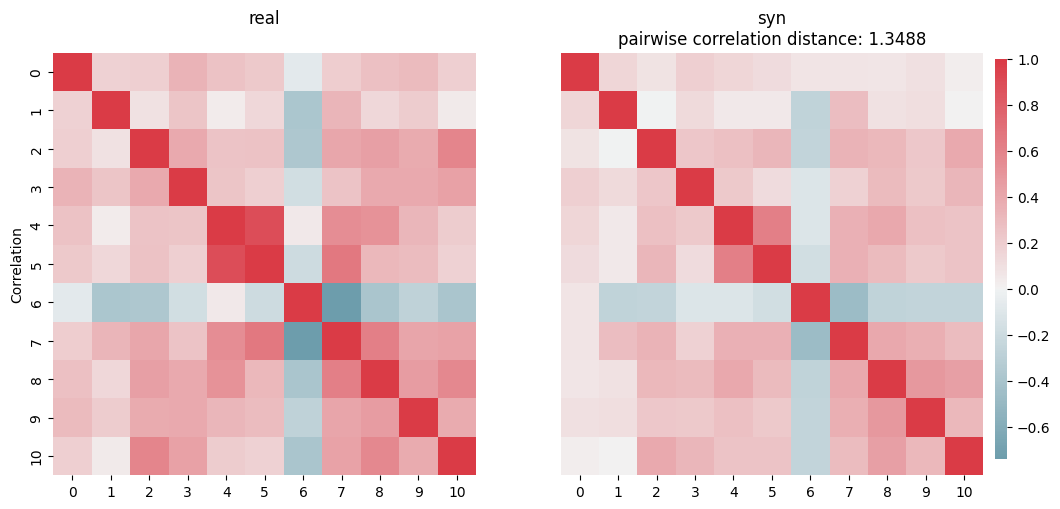

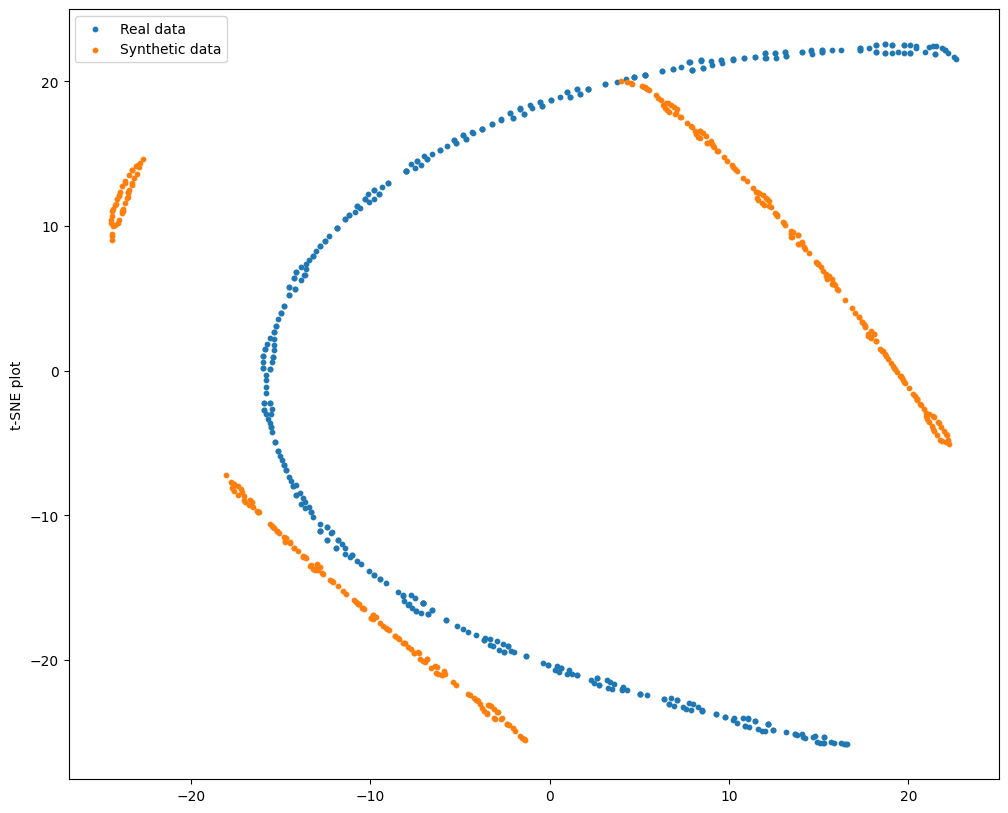

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from synthcity.plugins import Plugins
import synthcity.logger as log
from synthcity.plugins.core.dataloader import GenericDataLoader

loader = GenericDataLoader(X, target_column="target")
syn_model.plot(plt, loader)

plt.show()